In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13711823117465090019
 xla_global_id: -1]

In [5]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set GPU memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Limit GPU memory usage to 60% of total memory
        for gpu in gpus:
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=0.6)])
        
        # Your model training code goes here
        
    except RuntimeError as e:
        print(e)


In [114]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import os
import matplotlib.pyplot as plt

In [115]:
BATCH_SIZE = 16
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30

In [116]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('C:/Thesis/Plantvillage_2',
                                                              shuffle=True,
                                                              image_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                                              batch_size = BATCH_SIZE)
                                                              
                                                              
#Displaying total files and class Names. 

Found 49450 files belonging to 33 classes.


In [9]:
#Display total class Names
dataset.class_names

['Apple_Black Rot',
 'Apple_Ceda Rust',
 'Apple_Healthy',
 'Apple__Scab',
 'Cherry_Healthy',
 'Cherry_Powdery Mildew',
 'Corn_Cercospora Leaf Spot',
 'Corn_Common Rust',
 'Corn_Healthy',
 'Corn_Northern Leaf Blight',
 'Grape_Black Rot',
 'Grape_Esca (Black Measles)',
 'Grape_Healthy',
 'Grape_Leaf Blight',
 'Peach_Bacterial Spot',
 'Peach_Healthy',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Rice_Bacterial leaf blight',
 'Rice_Brown spot',
 'Rice_Leaf smut',
 'Strawberry_Healthy',
 'Strawberry_Leaf Scorch',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'wheat_Healthy',
 'wheat_septoria',
 'wheat_stripe_rust']

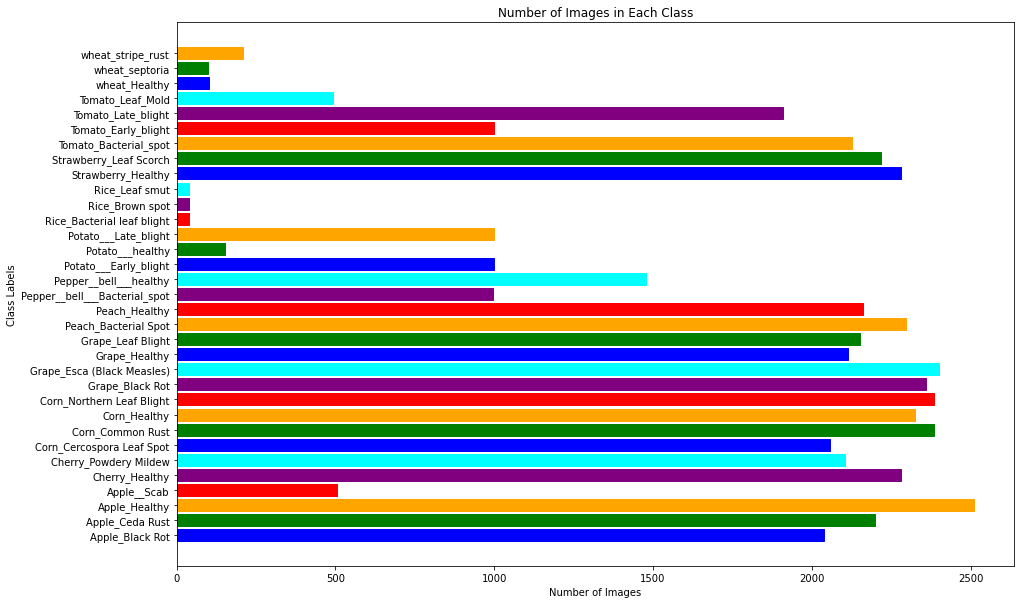

In [121]:
class_folders = [f.path for f in os.scandir('C:/Thesis/Plantvillage_2') if f.is_dir()]

# Count the number of images in each class folder
class_counts = []
class_labels = []

for class_folder in class_folders:
    class_label = os.path.basename(class_folder)
    class_labels.append(class_label)
    
    # Count the number of files (images) in the class folder
    file_count = sum([len(files) for _, _, files in os.walk(class_folder)])
    class_counts.append(file_count)

# Plot the graph with increased image size and colored bars
fig, ax = plt.subplots(figsize=(15, 10))
bars = ax.barh(class_labels, class_counts)

# Customize the colors of the bars
colors = ['blue', 'green', 'orange', 'red', 'purple', 'cyan']  # Define your desired colors
for i, bar in enumerate(bars):
    bar.set_color(colors[i % len(colors)])

plt.xlabel("Number of Images")
plt.ylabel("Class Labels")
plt.title("Number of Images in Each Class")
plt.show()

In [12]:
len(dataset)  # 3096 is actually total number of batches

3091

In [13]:
3091 * 16  # 49450 is the actual number of Images, it is showing a little more Might be the last batch is not that perfect

49456

In [16]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())   #converting every element from label_bacth from Tensor to Numpy
    #It shows that there are 16 images in each batch of size 256 *256 and 3 refers to the RGB channels

(16, 256, 256, 3)
[ 7 24  6  5 28 25  0 14  5  2 16  0 13  0  7 17]


In [17]:
# Print first Image

In [20]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[109. 107. 118.]
  [110. 108. 119.]
  [111. 109. 120.]
  ...
  [112. 109. 118.]
  [116. 113. 122.]
  [122. 119. 128.]]

 [[110. 108. 119.]
  [112. 110. 121.]
  [114. 112. 123.]
  ...
  [120. 117. 126.]
  [120. 117. 126.]
  [120. 117. 126.]]

 [[109. 107. 118.]
  [111. 109. 120.]
  [114. 112. 123.]
  ...
  [128. 125. 134.]
  [124. 121. 130.]
  [119. 116. 125.]]

 ...

 [[115. 107. 105.]
  [115. 107. 105.]
  [115. 107. 105.]
  ...
  [120. 112. 109.]
  [133. 125. 122.]
  [149. 141. 138.]]

 [[116. 108. 106.]
  [116. 108. 106.]
  [116. 108. 106.]
  ...
  [131. 123. 120.]
  [143. 135. 132.]
  [158. 150. 147.]]

 [[119. 111. 109.]
  [119. 111. 109.]
  [119. 111. 109.]
  ...
  [130. 122. 119.]
  [132. 124. 121.]
  [138. 130. 127.]]]


In [27]:
class_names = dataset.class_names

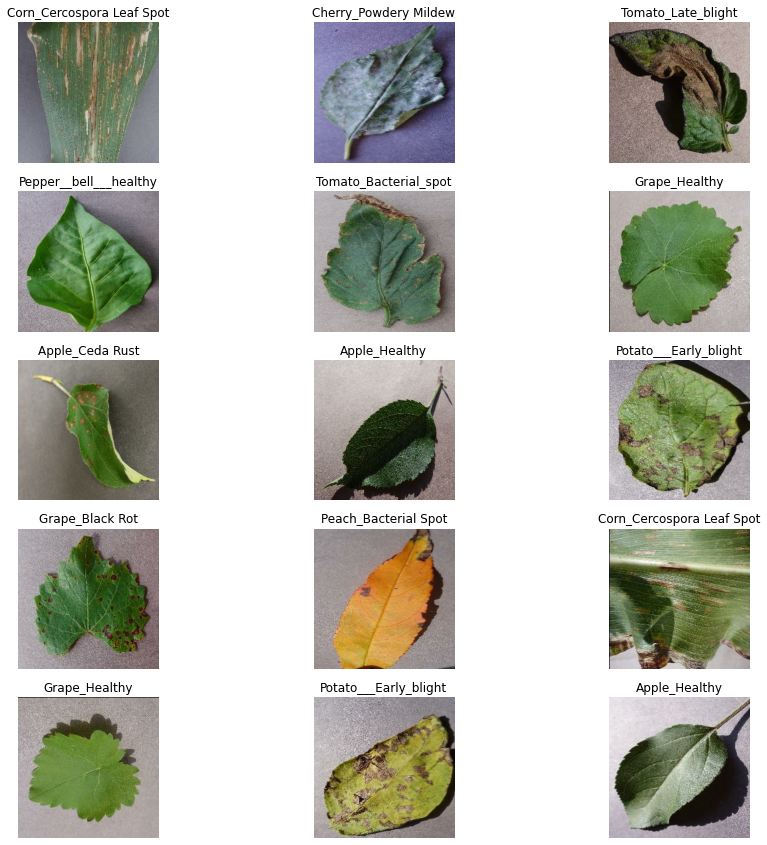

In [36]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(15):
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [38]:
# 80% --- Training
# 20 % -- 10 % validation, 10  % test

In [39]:
#Using Train , Test, Split Methods from Sklearn

In [40]:
train_size = 0.8 # 80 %
len(dataset)*train_size

2472.8

In [43]:
train_ds = dataset.take(2472) #lets take the first 2472 batches as Training. 
len(train_ds)

2472

In [44]:
test_ds = dataset.skip(2472)
len(test_ds)

619

In [45]:
val_size = 0.1
len(dataset)*val_size

309.1

In [46]:
test_ds = test_ds.skip(309)
len(test_ds)

310

# Function to split TRAIN, TEST, SPLIT

In [64]:
def get_dataset_splits(ds, train_split =0.8, val_split =0.1, test_split =0.1, shuffle =True,shuffle_size=20000):
    
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    
    val_ds = ds.skip(train_size).take(val_size)
    
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [65]:
train_ds, val_ds, test_ds = get_dataset_splits(dataset)


In [51]:
len(train_ds)


2472

In [69]:
# len(val_ds)


In [53]:
len(test_ds)


310

In [55]:
#Cache, Shuffle, and Prefetch the Dataset

In [56]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

# IMAGE PREPROCESSING

In [63]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])
#Just to make sure if any of the images are not of the Size 256*256
#Rescaling the input images by dividing each pixel value by 255which makes the value of each pixel in the image btw range 0 and 1

# Data Augmentation 

In [67]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [68]:
# Applying Data Augmentation to the Train Dataset

# Model Building

In [83]:
from tensorflow import keras
from tensorflow.keras import layers

BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
n_classes = 33

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1.0/255),  # Rescale input images
    
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),  # Normalize the probability of classes
])

model.build(input_shape=(None, *input_shape))


In [84]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 60, 60, 64)      

# Model Compilation

In [85]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [86]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15,
)

Epoch 1/15
2472/2472 [==============================] - 1756s 641ms/step - loss: 0.9120 - accuracy: 0.7291 - val_loss: 0.3347 - val_accuracy: 0.8892
Epoch 2/15
2472/2472 [==============================] - 1667s 610ms/step - loss: 0.2893 - accuracy: 0.9075 - val_loss: 0.2276 - val_accuracy: 0.9267
Epoch 3/15
2472/2472 [==============================] - 1664s 607ms/step - loss: 0.1845 - accuracy: 0.9404 - val_loss: 0.1216 - val_accuracy: 0.9618
Epoch 4/15
2472/2472 [==============================] - 1659s 608ms/step - loss: 0.1304 - accuracy: 0.9583 - val_loss: 0.0613 - val_accuracy: 0.9826
Epoch 5/15
2472/2472 [==============================] - 1666s 606ms/step - loss: 0.1081 - accuracy: 0.9654 - val_loss: 0.0548 - val_accuracy: 0.9836
Epoch 6/15
2472/2472 [==============================] - 1665s 607ms/step - loss: 0.0836 - accuracy: 0.9741 - val_loss: 0.0907 - val_accuracy: 0.9708
Epoch 7/15
2472/2472 [==============================] - 1662s 604ms/step - loss: 0.0726 - accuracy: 0.9758

In [87]:
scores = model.evaluate(test_ds)


310/310 [==============================] - 257s 165ms/step - loss: 0.0211 - accuracy: 0.9935


In [91]:
scores

[0.02107582986354828, 0.9935483932495117]

In [88]:
history


In [89]:
history.params


{'verbose': 1, 'epochs': 15, 'steps': 2472}

In [90]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [95]:
history.history['loss'][:5] # show loss for first 5 epochs


[0.9120057821273804,
 0.28932705521583557,
 0.18446266651153564,
 0.13042695820331573,
 0.10814858227968216]

Text(0.5, 1.0, 'Training and Validation Accuracy')

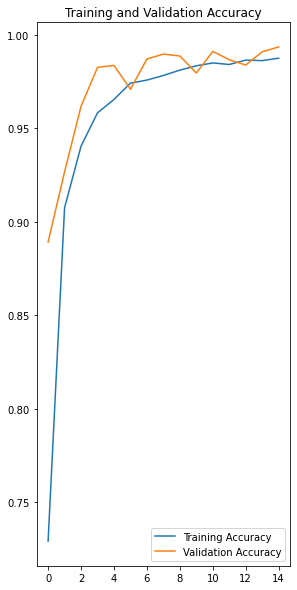

In [107]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

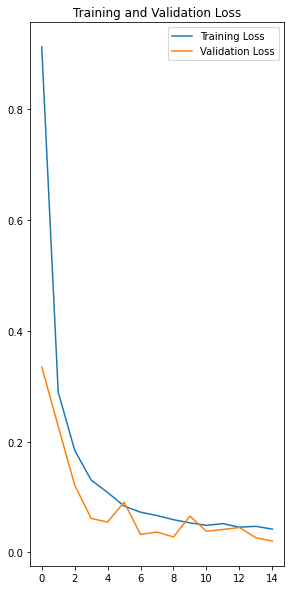

In [108]:
plt.figure(figsize=(10, 10))
EPOCHS = len(loss) # or len(val_loss)
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Prediction on a sample image

first image to predict
actual label: Corn_Healthy
1/1 [==============================] - 1s 724ms/step
predicted label: Corn_Healthy


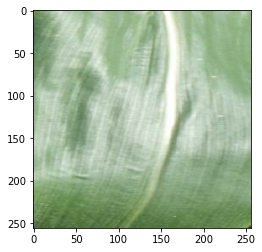

In [109]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])]) # predict the First Image

In [111]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 30ms/step


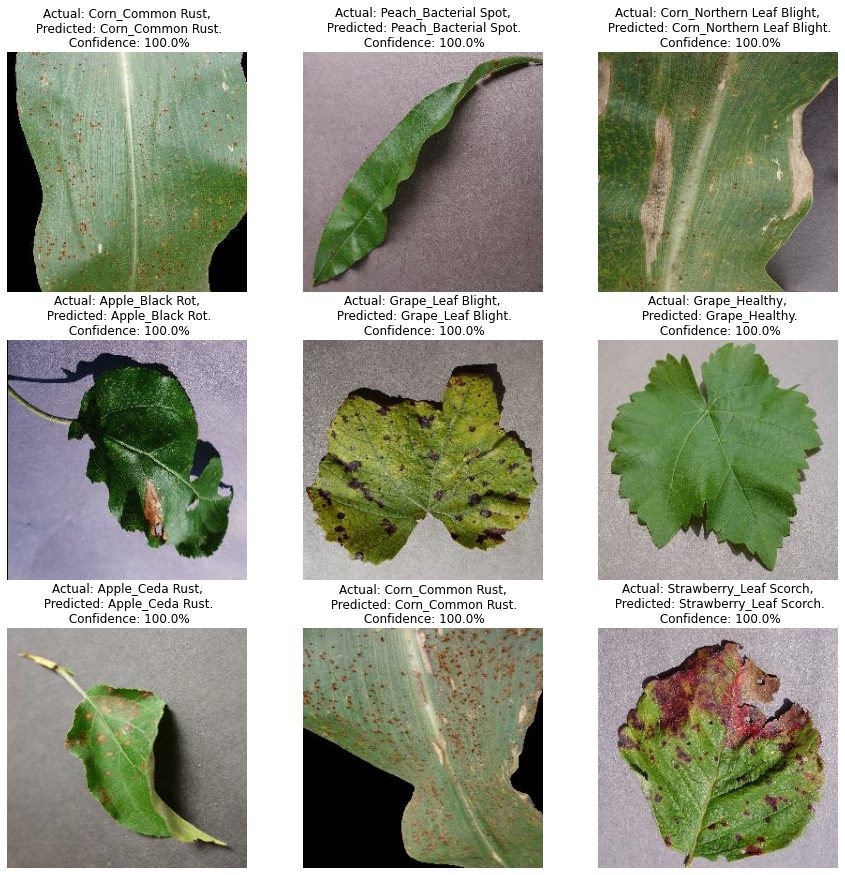

In [112]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [122]:
model.save('C:/Thesis/PlantVillage.h5')


C:\ProgramData\Anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [123]:
tf.keras.models.save_model(model, 'C:/Thesis/my_model.keras')
